<a href="https://colab.research.google.com/github/Koyac/Image100knocks1/blob/restart/Image100knocks3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/yoyoyo-yo/Gasyori100knock

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


threshold >> 127


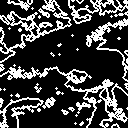

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Grayscale
gray = BGR2GRAY(img)

# Otsu's binarization
otsu = otsu_binarization(gray)

# Erode image
eroded = Erode(otsu)

# Delate image
dilated = Dilate(otsu)

# Morphology
out = np.abs(eroded - dilated) * 255
                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

threshold >> 127


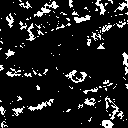

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out

# Opening morphology
def Morphology_Opening(img, time=1):
    dil = Dilate(img, Dil_time=time)
    erode = Erode(dil, Erode_time=time)
    return erode

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Grayscale
gray = BGR2GRAY(img)

# Otsu's binarization
otsu = otsu_binarization(gray)

# Opening process
opened = Morphology_Opening(otsu, time=3)

# Tophat
out = np.abs(otsu - opened) * 255
                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow( out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out

def Morphology_Closing(img,time=1):
  erode = Erode(img,Erode_time=time)
  dil = Dilate(erode,Dil_time=time)
  return erode

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

gray = BGR2GRAY(img)

otsu = otsu_binarization(gray)

opened = Morphology_Closing(otsu,time=3)
out = np.abs(opened - otsu) * 255

cv2.imwrite('out.jpg',out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# template matching
def Template_matching(img, template):
    # get original image shape
    H, W, C = img.shape

    # get template image shape
    Ht, Wt, Ct = template.shape

    # Templete matching
    # prepare x, y index
    i, j = -1, -1
    # prepare evaluate value
    v = 255 * H * W * C

    for y in range(H - Ht):
        for x in range(W - Wt):
            # get SAD value
            _v = np.sum(np.abs(img[y : y + Ht, x : x + Wt] - template))

            # if SAD is min
            if _v < v:
                v = _v
                i, j = x, y

    out = img.copy()
    # draw rectangle
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)

    return out

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Read templete image
template = cv2.imread("imori_part.jpg").astype(np.float32)

# Template matching
out = Template_matching(img, template)

                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()